<a href="https://colab.research.google.com/github/Geeth-Rath/A-ML/blob/main/Sementic_Anlysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Semantic Analysis among llama 70B and 8B models

In [ ]:
pip install groq

In [ ]:
import pandas as pd
from google.colab import drive
from google.colab import userdata
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import matplotlib.pyplot as plt
import os
from groq import Groq
from sklearn.metrics import classification_report

## Dataset

In [ ]:

userdata.get('GROQ_API_KEY')

'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'

In [ ]:

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/IMDB_dataset/IMDB Dataset.csv', nrows=53)

In [ ]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.tail()

,review,sentiment
48,Preston Sturgis' THE POWER AND THE GLORY was u...,positive
49,Average (and surprisingly tame) Fulci giallo w...,negative
50,Return to the 36th Chamber is one of those cla...,positive
51,"***SPOILERS*** All too, in real life as well a...",positive
52,Bela Lugosi appeared in several of these low b...,positive


In [ ]:
df.describe()

,review,sentiment
count,53,53
unique,53,2
top,One of the other reviewers has mentioned that ...,negative
freq,1,27


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     53 non-null     object
 1   sentiment  53 non-null     object
dtypes: object(2)
memory usage: 980.0+ bytes


In [ ]:
df.duplicated().sum()

0

In [ ]:
df["sentiment"].value_counts()

,count
sentiment,
negative,27
positive,26


In [ ]:
min_count = df["sentiment"].value_counts().min()

In [ ]:
print(df["sentiment"].value_counts())


sentiment
negative    27
positive    26
Name: count, dtype: int64


In [ ]:
min_count = df["sentiment"].value_counts().min()

df_positive = df[df["sentiment"] == "positive"].sample(n=min_count, random_state=42)
df_negative = df[df["sentiment"] == "negative"].sample(n=min_count, random_state=42)

df = pd.concat([df_positive, df_negative]).reset_index(drop=True)

print(df["sentiment"].value_counts())

sentiment
positive    26
negative    26
Name: count, dtype: int64


In [ ]:
df

,review,sentiment
0,Some films just simply should not be remade. T...,positive
1,"""Ardh Satya"" is one of the finest film ever ma...",positive
2,One of the other reviewers has mentioned that ...,positive
3,"***SPOILERS*** All too, in real life as well a...",positive
4,"What an absolutely stunning movie, if you have...",positive
5,"I remember this film,it was the first film i h...",positive
6,"""The Cell"" is an exotic masterpiece, a dizzyin...",positive
7,A wonderful little production. <br /><br />The...,positive
8,Return to the 36th Chamber is one of those cla...,positive
9,I sure would like to see a resurrection of a u...,positive


In [ ]:
df["sentiment"] = df["sentiment"].str.lower().apply(lambda x: 1 if x == "positive" else 0)

In [ ]:
df.head()

,review,sentiment
0,Some films just simply should not be remade. T...,1
1,"""Ardh Satya"" is one of the finest film ever ma...",1
2,One of the other reviewers has mentioned that ...,1
3,"***SPOILERS*** All too, in real life as well a...",1
4,"What an absolutely stunning movie, if you have...",1


### models

In [ ]:
# review = df['review'][0]

In [ ]:
api_key = userdata.get('GROQ_API_KEY')

In [ ]:
prompt = f"Classify the sentiment of this review as either 'positive' or 'negative'. Only respond with 'positive' or 'negative' and nothing else.\n\nReview:\n{review}\n\nSentiment:"


In [ ]:
client = Groq(
    api_key= api_key,
)

In [ ]:
def get_sentiment(review, model):

    prompt = f"Classify the sentiment of this review as either 'positive' or 'negative'. Only respond with 'positive' or 'negative' and nothing else.\n\nReview:\n{review}\n\nSentiment:"


    chat_completion = client.chat.completions.create(
        messages=[{"role": "user", "content": prompt}],
        model=model
    )
    sentiment = chat_completion.choices[0].message.content.strip().lower()

    return 1 if sentiment == "positive" else 0

In [ ]:
llama_70b = "llama3-70b-8192"
llama_8b = "llama3-8b-8192"

In [ ]:
df['Predicted_70B'] = df["review"].apply(lambda x: get_sentiment(x, llama_70b))
df['Predicted_8B'] = df["review"].apply(lambda x: get_sentiment(x, llama_8b))

In [ ]:
df

,review,sentiment,Predicted_70B,Predicted_8B
0,Some films just simply should not be remade. T...,1,0,0
1,"""Ardh Satya"" is one of the finest film ever ma...",1,1,1
2,One of the other reviewers has mentioned that ...,1,1,1
3,"***SPOILERS*** All too, in real life as well a...",1,0,0
4,"What an absolutely stunning movie, if you have...",1,1,1
5,"I remember this film,it was the first film i h...",1,1,1
6,"""The Cell"" is an exotic masterpiece, a dizzyin...",1,1,1
7,A wonderful little production. <br /><br />The...,1,1,1
8,Return to the 36th Chamber is one of those cla...,1,1,1
9,I sure would like to see a resurrection of a u...,1,1,1


### counting predicted and actual values

In [ ]:
match_count = (df["Predicted_70B"] == df["sentiment"]).sum()
mismatch_count = (df["Predicted_70B"] != df["sentiment"]).sum()

print(f"Matching cases: {match_count}")
print(f"Non-matching cases: {mismatch_count}")


Matching cases: 49
Non-matching cases: 3


In [ ]:
match_count = (df["Predicted_8B"] == df["sentiment"]).sum()
mismatch_count = (df["Predicted_8B"] != df["sentiment"]).sum()

print(f"Matching cases: {match_count}")
print(f"Non-matching cases: {mismatch_count}")

Matching cases: 48
Non-matching cases: 4


In [ ]:
matches_70B = df[df["Predicted_70B"] == df["sentiment"]][[ "review", "sentiment", "Predicted_70B"]]
mismatches_70B = df[df["Predicted_70B"] != df["sentiment"]][[ "review", "sentiment", "Predicted_70B"]]

In [ ]:
matches_70B

,review,sentiment,Predicted_70B
1,"""Ardh Satya"" is one of the finest film ever ma...",1,1
2,One of the other reviewers has mentioned that ...,1,1
4,"What an absolutely stunning movie, if you have...",1,1
5,"I remember this film,it was the first film i h...",1,1
6,"""The Cell"" is an exotic masterpiece, a dizzyin...",1,1
7,A wonderful little production. <br /><br />The...,1,1
8,Return to the 36th Chamber is one of those cla...,1,1
9,I sure would like to see a resurrection of a u...,1,1
10,I thought this was a wonderful way to spend ti...,1,1
12,"Taut and organically gripping, Edward Dmytryk'...",1,1


In [ ]:
mismatches_70B

,review,sentiment,Predicted_70B
0,Some films just simply should not be remade. T...,1,0
3,"***SPOILERS*** All too, in real life as well a...",1,0
11,The Karen Carpenter Story shows a little more ...,1,0


In [ ]:
matches_8B = df[df["Predicted_8B"] == df["sentiment"]][[ "sentiment", "Predicted_8B"]]
mismatches_8B = df[df["Predicted_8B"] != df["sentiment"]][[ "review", "sentiment", "Predicted_8B"]]

In [ ]:
matches_8B

,sentiment,Predicted_8B
1,1,1
2,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,1,1
10,1,1
12,1,1


In [ ]:
mismatches_8B

,review,sentiment,Predicted_8B
0,Some films just simply should not be remade. T...,1,0
3,"***SPOILERS*** All too, in real life as well a...",1,0
11,The Karen Carpenter Story shows a little more ...,1,0
20,"This movie struck home for me. Being 29, I rem...",1,0


In [ ]:
mismatches_70B

,review,sentiment,Predicted_70B
0,Some films just simply should not be remade. T...,1,0
3,"***SPOILERS*** All too, in real life as well a...",1,0
11,The Karen Carpenter Story shows a little more ...,1,0


### confusion matrix

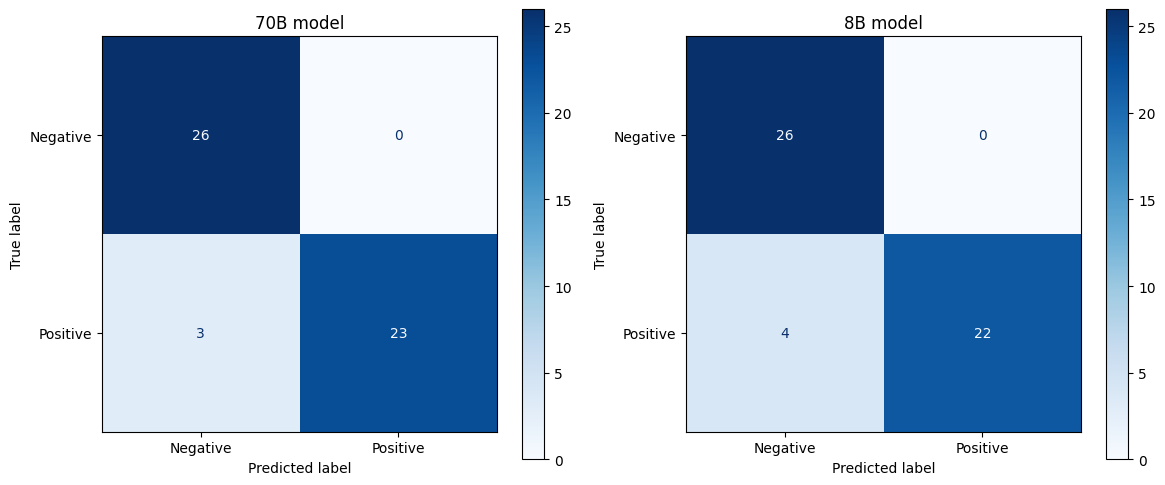

In [ ]:
cm_70B = confusion_matrix(df["sentiment"], df["Predicted_70B"])
cm_8B = confusion_matrix(df["sentiment"], df["Predicted_8B"])

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

disp_70B = ConfusionMatrixDisplay(confusion_matrix=cm_70B, display_labels=["Negative", "Positive"])
disp_70B.plot(cmap=plt.cm.Blues, ax=axes[0])
axes[0].set_title("70B model")

disp_8B = ConfusionMatrixDisplay(confusion_matrix=cm_8B, display_labels=["Negative", "Positive"])
disp_8B.plot(cmap=plt.cm.Blues, ax=axes[1])
axes[1].set_title("8B model")

plt.tight_layout()
plt.show()

### Classification report

In [ ]:
print("Classification Report for 70B model:")
print(classification_report(df["sentiment"], df["Predicted_70B"], target_names=["Negative", "Positive"]))


Classification Report for 70B model:
              precision    recall  f1-score   support

    Negative       0.90      1.00      0.95        26
    Positive       1.00      0.88      0.94        26

    accuracy                           0.94        52
   macro avg       0.95      0.94      0.94        52
weighted avg       0.95      0.94      0.94        52



In [ ]:
print("Classification Report for 8B model:")
print(classification_report(df["sentiment"], df["Predicted_8B"], target_names=["Negative", "Positive"]))

Classification Report for 8B model:
              precision    recall  f1-score   support

    Negative       0.87      1.00      0.93        26
    Positive       1.00      0.85      0.92        26

    accuracy                           0.92        52
   macro avg       0.93      0.92      0.92        52
weighted avg       0.93      0.92      0.92        52



### Accuracy

In [ ]:
accuracy_70B = accuracy_score(df["sentiment"], df["Predicted_70B"])

accuracy_8B = accuracy_score(df["sentiment"], df["Predicted_8B"])

print(f"Accuracy of 70B model: {accuracy_70B:.4f}")
print(f"Accuracy of 8B model: {accuracy_8B:.4f}")


Accuracy of 70B model: 0.9423
Accuracy of 8B model: 0.9231


### 280 data points

In [ ]:
df_all = pd.read_csv('/content/drive/MyDrive/IMDB_dataset/IMDB Dataset.csv', nrows=300)

In [ ]:
df_all.shape

(300, 2)

In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     300 non-null    object
 1   sentiment  300 non-null    object
dtypes: object(2)
memory usage: 4.8+ KB


In [ ]:
df_all.duplicated().sum()

0

In [ ]:
df_all["sentiment"].value_counts()

,count
sentiment,
negative,161
positive,139


In [ ]:
min_count = df_all["sentiment"].value_counts().min()

df_all_positive = df_all[df_all["sentiment"] == "positive"].sample(n=min_count, random_state=42)
df_all_negative = df_all[df_all["sentiment"] == "negative"].sample(n=min_count, random_state=42)

df_all = pd.concat([df_all_positive, df_all_negative]).reset_index(drop=True)

print(df_all["sentiment"].value_counts())

sentiment
positive    139
negative    139
Name: count, dtype: int64


In [ ]:
df_all["sentiment"] = df_all["sentiment"].str.lower().apply(lambda x: 1 if x == "positive" else 0)

In [ ]:
df_all.shape

(278, 2)

In [ ]:
df_all['Predicted_70B'] = df_all["review"].apply(lambda x: get_sentiment(x, llama_70b))
df_all['Predicted_8B'] = df_all["review"].apply(lambda x: get_sentiment(x, llama_8b))

In [ ]:
df_all

,review,sentiment,Predicted_70B,Predicted_8B
0,"In ""Brave New Girl,"" Holly comes from a small ...",1,1,1
1,A young girl becomes a war-time marine's pen-p...,1,1,1
2,I thought that Mukhsin has been wonderfully wr...,1,1,1
3,"""Lost"", ""24"", ""Carnivale"", ""Desperate Housewif...",1,1,1
4,This short film that inspired the soon-to-be f...,1,1,0
...,...,...,...,...
273,Oh noes one of these attack of the Japanese gh...,0,0,0
274,The box is why I originally picked up this mov...,0,0,0
275,"Okay, last night, August 18th, 2004, I had the...",0,0,0
276,This was probably the worst movie i have ever ...,0,0,0


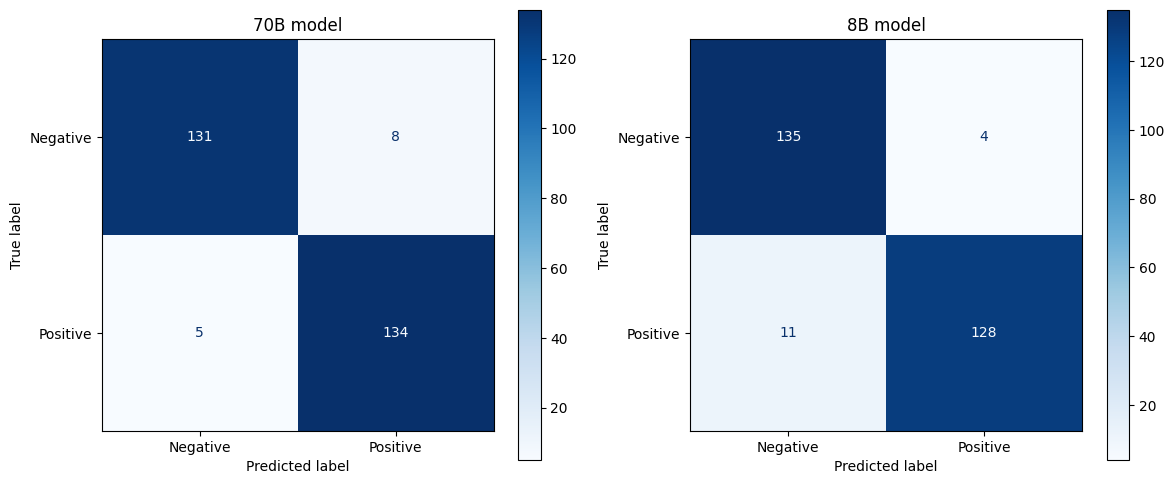

In [ ]:
cm_70B = confusion_matrix(df_all["sentiment"], df_all["Predicted_70B"])
cm_8B = confusion_matrix(df_all["sentiment"], df_all["Predicted_8B"])

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

disp_70B = ConfusionMatrixDisplay(confusion_matrix=cm_70B, display_labels=["Negative", "Positive"])
disp_70B.plot(cmap=plt.cm.Blues, ax=axes[0])
axes[0].set_title("70B model")

disp_8B = ConfusionMatrixDisplay(confusion_matrix=cm_8B, display_labels=["Negative", "Positive"])
disp_8B.plot(cmap=plt.cm.Blues, ax=axes[1])
axes[1].set_title("8B model")

plt.tight_layout()
plt.show()

In [ ]:
accuracy_70B = accuracy_score(df_all["sentiment"], df_all["Predicted_70B"])

accuracy_8B = accuracy_score(df_all["sentiment"], df_all["Predicted_8B"])

print(f"Accuracy of 70B model: {accuracy_70B:.4f}")
print(f"Accuracy of 8B model: {accuracy_8B:.4f}")


Accuracy of 70B model: 0.9532
Accuracy of 8B model: 0.9460


In [ ]:
print("Classification Report for 70B model:")
print(classification_report(df_all["sentiment"], df_all["Predicted_70B"], target_names=["Negative", "Positive"]))

Classification Report for 70B model:
              precision    recall  f1-score   support

    Negative       0.96      0.94      0.95       139
    Positive       0.94      0.96      0.95       139

    accuracy                           0.95       278
   macro avg       0.95      0.95      0.95       278
weighted avg       0.95      0.95      0.95       278



In [ ]:
print("Classification Report for 8B model:")
print(classification_report(df_all["sentiment"], df_all["Predicted_8B"], target_names=["Negative", "Positive"]))

Classification Report for 8B model:
              precision    recall  f1-score   support

    Negative       0.92      0.97      0.95       139
    Positive       0.97      0.92      0.94       139

    accuracy                           0.95       278
   macro avg       0.95      0.95      0.95       278
weighted avg       0.95      0.95      0.95       278

